# Tam sayı dizileri ikili matris haline dönüştürmek

Elimizde bulunan bir sayı dizisini olduğu gibi bir sinir ağına gönderirsek bu çalışmaz öncelikli olarak bu listenin bir tensöre dönüştürülmesi gerekiyor

In [1]:
import numpy as np

In [2]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
def vectorize_sequences(sequences,dimension=10000):
    '''Verilen bir tam sayı dizisini ikili matris haline getirir'''
    # (len(sequences),dimensions) boyutlarında tüm elemanları sıfır olan bir matris oluşturuyoruz.
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1. # results[i]'nin istenen indexlerini 1 yapar.
    return results

In [4]:
s=np.array([3,5])
vectorize_sequences(s,10)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [5]:
x_train=vectorize_sequences(train_data) # Eğitim verisinin hazırlanması
x_test=vectorize_sequences(test_data) # Test verisinin hazırlanması

y_train=np.asarray(train_labels).astype("float32") # Eğitim label verisinin vektör haline getirilmesi
y_test=np.asarray(test_labels).astype("float32") # Test label verisinin vektör haline getirilmesi

***Ağınızı İnşa Etmek***
Eğer ki girdiler vektör, etiketler ise skaler ise bu durumda stack ağ tipinde sıkı bağlı (dense) katmanlardan ve aktivasyon fonksiyonu relu olan bir ağ en iyi tercih olacaktır.  <code>Dense(16,activation='relu')</code> Buradaki ***16*** parametresi ağımızda kaç tane gizli katman olacağını söyler. ***Gizli birim sayısı gösterim uzayının boyutudur*** Ne kadar fazla birim daha karmaşık bir ağ yapısıdır. Bu fazla katmanlar ağımızın daha detaylı öğrenmesini sağlayacaktır ama bu durum over fit durumuna neden olabilir. 

Dense katmanlarından oluşan stack bir ağda iki önemli mimari karar vardır.
* Kaç katman olacağı (Aşağıdaki örnekte: Üç katmandan oluşacak. Üçüncü katman skaler çıktı üretecek)
* Her katmanda kaç gizli birim olacağı (Aşağıdaki örnekte: 16 gizli birim)

Ara katmanların aktivasyon fonksiyonu olarak ***relu*** kullanılacak. Son katmanda ise ***sigmoid*** kullanılarak çıktıların olasılık değerlerine (0-1) dönüştürecek. 

In [6]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16, activation="relu",input_shape=(10000,)))
model.add(layers.Dense(16,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

Şimdi ise bir ***loss*** fonksiyonu ve ***optimization*** algoritması seçme adımına geldik. Aşağıdaki örnekte istediğimiz şey bir ikili sınıflandırma problemi olduğu ve ağımızın çıktısı bir olasılık değeri olduğu için ***binary_crossentropy*** kullanmak mantıklı olacaktır. Bu tek seçenek değil aslında ***mean_squared_error*** da kullanılabilir.

***relu*** gibi bir aktivasyon fonksiyonu ise doğrusallığı kaldıran ağımızın daha iyi öğrenmesini sağlayan fonksiyondur. relu dışında ***prelu*** ve ***elu*** aktivasyon fonksiyonları da kullanılabilir. Optimizer olarak ***rmsprop*** kullanacağız.

In [7]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

***rmsprop, binary_crossentropy, accuracy*** Keras içerisinde tanımlı olduğu için direkt parametre olarak model tanımlar iken kullanabiliyoruz. Bununla birlikte <code>optimizer</code> algoritmasının parameterelerini değiştirebilir yada kendi yazdığınız <code>loss</code> fonksiyonunu kullanabilirsiniz.  

In [8]:
# Optimizer algoritmasının farklı parametreler ile çalıştırılması
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [9]:
#Kendi loss fonksiyonumuzu kullanmak
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

Train sonunda oluşan modelin ne kadar başarılı olduğunu kontrol etmemiz gerekiyor. Bunu ***validation*** adımı ile yaparız. Bunun için öncelikli olarak eğitim sürecinde modelin hiç görmediği veri setinden bir validation veri seti yaratmamız gerekiyor.

In [10]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]


Artık modelimizi eğitebiliriz.

In [11]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["acc"])

In [12]:
history=model.fit(partial_x_train,partial_y_train, epochs=20, batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.5235 - acc: 0.7899 - val_loss: 0.3997 - val_acc: 0.8727
Epoch 2/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.3204 - acc: 0.9014 - val_loss: 0.3215 - val_acc: 0.8797
Epoch 3/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.2372 - acc: 0.9236 - val_loss: 0.3103 - val_acc: 0.8735
Epoch 4/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1890 - acc: 0.9379 - val_loss: 0.2763 - val_acc: 0.8889
Epoch 5/20
15000/15000 [==============================] - 1s 87us/step - loss: 0.1550 - acc: 0.9518 - val_loss: 0.2765 - val_acc: 0.8891
Epoch 6/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.1309 - acc: 0.9584 - val_loss: 0.2925 - val_acc: 0.8869
Epoch 7/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.1092 - acc: 0.9666 - val_loss: 0.3093 - val_acc

In [13]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Şimdi eğitim ve doğrulamanın kayıplarının grafiklerini çizdirerek inceleyelim.

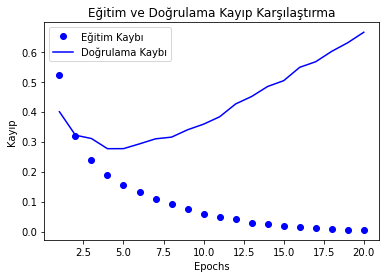

In [14]:

import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,"bo",label="Eğitim Kaybı")# "bo" parametresi ile noktalı çizim yaptırıyoruz
plt.plot(epochs,val_loss_values,"b",label="Doğrulama Kaybı") # "b" düz çizgi
plt.title("Eğitim ve Doğrulama Kayıp Karşılaştırma")
plt.xlabel("Epochs")
plt.ylabel("Kayıp")
plt.legend()

plt.show()

Eğitim ve doğrulamada başarım karşılaştırmasını yapalım

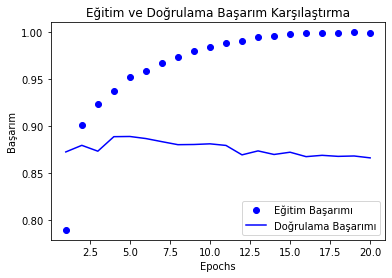

In [15]:
acc=history_dict["acc"]
val_acc=history_dict["val_acc"]


plt.plot(epochs,acc,"bo",label="Eğitim Başarımı")# "bo" parametresi ile noktalı çizim yaptırıyoruz
plt.plot(epochs,val_acc,"b",label="Doğrulama Başarımı") # "b" düz çizgi
plt.title("Eğitim ve Doğrulama Başarım Karşılaştırma")
plt.xlabel("Epochs")
plt.ylabel("Başarım")
plt.legend()

plt.show()

Yukarıda gördüğümüz durumla epochs "deneme" sayısı arttıkça eğitim sürecince kaybın azaldığını ve başarımın arttığını görmekle birlikte validation aşamasında bunların azaldığını görüyoruz. Bu durum makine öğrenmesinde ***overfitting*** olarak adlandırılan durumdur. Bu durumdan kurtulmak için epochs sayısını azaltarak modelimizi tekrar çalıştıracağız.

In [16]:
model.fit(partial_x_train,partial_y_train, epochs=4, batch_size=512,validation_data=(x_val,y_val)) # epochs=4 dedik
results=model.evaluate(x_test,y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 1s 84us/step - loss: 0.0031 - acc: 0.9997 - val_loss: 0.8003 - val_acc: 0.8504
Epoch 2/4
15000/15000 [==============================] - 1s 83us/step - loss: 0.0025 - acc: 0.9999 - val_loss: 0.7368 - val_acc: 0.8649
Epoch 3/4
15000/15000 [==============================] - 1s 84us/step - loss: 0.0037 - acc: 0.9993 - val_loss: 0.7780 - val_acc: 0.8642
Epoch 4/4
25000/25000 [==============================] - 2s 80us/step


In [17]:
results

[0.8805203700852394, 0.8487600088119507]

***Daha önce eğitilmiş bir modelin kullanılması***

In [18]:
model.predict(x_test) # Bu metod ie yukarıda oluşan modelin test verileri üzerinde başarılı tahminlerinin olasılıklarını
#görebiliriz. Bazılarından çok daha emin bazılarınından çok emin olmadığını bu istatistiklerden görebiliriz.

array([[1.9797087e-03],
       [1.0000000e+00],
       [1.6500953e-01],
       ...,
       [2.7853251e-04],
       [5.0397485e-02],
       [9.3900216e-01]], dtype=float32)